# STEP 2: Social Media Analysis: Twitter Exploratory Data Analysis

# EDA Plan - Exploration of main features
>* **Load libraries and clean the file for further analysis**
* **Number of tweets per company**
* **Sentiment analysis (Total and split per company)**
* **Origin of posts - Top 15 countries in terms of number of tweets and split per company**
* **Analysis of tweet characteristics**
* **Visualization of tweets over time and identification of outliers per company**
* **Analysis of numerical features and feature engineering**
* **Analysis of categorical features and feature engineering**
* **Conclusions**

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fftpack as sp
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats

import warnings
warnings.simplefilter("ignore")

import pandas_profiling

import plotly.offline


# Activate Seaborn style
sns.set()

## Load the file for analysis

In [2]:
# Importing the file and creating a dataframe
twitter_eda=pd.read_csv("C:/Users/fbaff/EPFL ML Python/5. Captsone/Twitter_EDA2_train.csv",low_memory=False, skipinitialspace=True)#, sep='\t'

In [3]:
# display all columns
pd.set_option('display.max_columns', None)

In [4]:
twitter_eda.head()

,Unnamed: 0,Post_ID,Date,Month,Company,Snippet,TW_Hashtags,Type_Channel,Country,Country 2,Sentiment,ALL_Author,ALL_Impact,ALL_Backlinks,ALL_Thread_Entry_Type,ALL_Tot_Monthly_Vis,ALL_MozRank,TW_Account_Type,TW_Account_Name,TW_NbImpressions,TW_KredInfluence,TW_KredOutreach,TWFB_NbReach,TW_NbFollowers,TW_NbFollowing,TW_Account_Retweet_of,TW_NbTweets
0,136417,898354849,2017-06-09,June,Thomson Reuters,anniversary project timesquare thomson reuters...,2017btsfesta,twitter,United States,United States,neutral,titina_joner,28,49850734,share,6000000000,9.6,individual,tw account not identified,56,424,0,424,56,162,btsnunachina,1650
1,416633,668466776,2017-03-20,March,Thomson Reuters,nearly canadians deport people illegally cross...,No TW hashtag,twitter,Slovenia,Other,neutral,dasCameo1,25,49850734,share,6000000000,9.6,individual,tw account not identified,26,379,0,379,26,140,reuters,4054
2,160969,467220348,2017-06-02,June,Thomson Reuters,support associate thomson reuters carrollton i...,"indeed, jobs",twitter,United States,United States,neutral,lumpyspace_tst2,25,49850734,post,6000000000,9.6,organisational,tw account not identified,22,372,0,372,22,0,not a rt,216721
3,339924,350836585,2017-04-12,April,Thomson Reuters,mifidii compliance challenge mifidii ready ana...,"MiFIDII, TRRisk",twitter,United Kingdom,United Kingdom,neutral,mifidii,64,49850734,post,6000000000,9.6,organisational,tw account not identified,16319,585,0,2521,842,154,not a rt,95
4,24824,673045446,2017-02-15,February,Informa,challenges implementing insurance projects imp...,"infographic, iot",twitter,United States,United States,neutral,daviddefelipe,41,49850734,share,6000000000,9.6,individual,david de felipe,1204,606,0,606,1204,1369,rt account not assigned,6850


In [5]:
# remove the Unnamed column
twitter_eda.drop('Unnamed: 0', axis=1, inplace=True)
twitter_eda.shape

(195880, 26)

## Overall feature analysis with the library pandas_profiling.ProfileReport()
> * Following the analysis the following columns will be removed: ALL_Backlinks, ALL_MozRank, ALL_Tot_Monthly_Vis, TW_KredInfluence, TW_NbImpressions, Type_Channel

In [6]:
# Command for performing the analysis
# pandas_profiling.ProfileReport(twitter_eda)

## Cleaning of the Dataframe for the analysis

In [7]:
# remove the following columns: ALL_Backlinks, ALL_MozRank, ALL_Tot_Monthly_Vis, TW_KredInfluence, TW_NbImpressions, Type_Channel, Month
twitter_eda.drop(['ALL_Backlinks', 'ALL_MozRank', 'ALL_Tot_Monthly_Vis', 'TW_KredInfluence', 'TW_NbImpressions', 'Type_Channel','Month'], axis=1,  inplace=True)
twitter_eda.shape

(195880, 19)

In [8]:
twitter_eda.describe()

,Post_ID,ALL_Impact,TW_KredOutreach,TWFB_NbReach,TW_NbFollowers,TW_NbFollowing,TW_NbTweets
count,1.958800e+05,195880.000000,195880.000000,1.958800e+05,1.958800e+05,195880.000000,1.958800e+05
mean,5.006551e+08,36.348632,1.765872,7.599199e+02,2.741312e+04,1281.350684,5.765952e+04
std,2.885219e+08,12.170163,2.755416,5.283246e+03,6.083080e+05,5463.733813,2.221858e+05
min,2.980000e+03,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,1.000000e+00
25%,2.500184e+08,28.000000,0.000000,4.150000e+02,6.000000e+01,81.000000,9.860000e+02
50%,5.006470e+08,36.000000,0.000000,5.350000e+02,3.730000e+02,308.000000,3.941000e+03
75%,7.512672e+08,44.000000,4.000000,6.640000e+02,1.837000e+03,1000.000000,2.528725e+04
max,9.999981e+08,80.000000,11.000000,2.043194e+06,2.015375e+07,415512.000000,7.452297e+06


### Transform date column into the appropriate format

In [9]:
twitter_eda["Date"] = pd.to_datetime(twitter_eda["Date"])

# Exploration of main features
> * **Number of tweets per company**
* **Sentiment analysis (Total and split per company)**
* **Origin of posts - Top 15 countries in terms of number of tweets and split per company**
* **Analysis of tweet characteristics**
* **Visualization of tweets over time and identification of outliers per company**

________________________________________________

## Total number of tweets per company
> * Companies could be grouped in 3 categories:
* **Thomson Reuters** issued the highest number of tweets over the period (+200k)
* **Pearson** is the second largest issuer of tweets (circa 20k)
* **Other companies** issued less than 10k of tweets
* In order to mitigate the impact of such unbalanced classes, we may consider to sample down tweets comming from (or mentioning) Thomson Reuters. It could impact the quality of the selected models

In [10]:
# Compute the total number of tweets per company
tot_comp=twitter_eda['Company'].value_counts()
tot_comp.sum()

195880

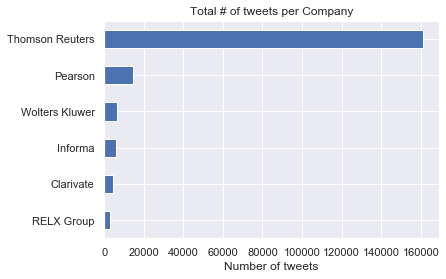

In [11]:
# Plot the total # of tweets per company
bar_plot =tot_comp.plot.barh()
bar_plot.set_title('Total # of tweets per Company')
bar_plot.set_xlabel('Number of tweets') # x label
bar_plot.invert_yaxis() # invert the y axis

____________________________________________

## Analysis of sentiment (Total + Split per company)
> * Large majority of tweets (93%) are classified as neutral
* Whilst TR is close to the total average (size effect), we can highlight some differences per company:
* **Clarivate**: Higher positive and lower negative than average
* **Pearson**: Higher positive and negative vs average
* **Informa**: Slightly more neutral than average
* **RELX and Wolters Kluwer**: Slightly lower neutral than average

In [12]:
# Crosstab Companies and Sentiment (%)
breakdown=pd.crosstab(index=[twitter_eda['Sentiment']], columns=twitter_eda['Company'], values=twitter_eda['Post_ID'], aggfunc='count', margins=True)
100*(breakdown/breakdown.loc['All'])

Company,Clarivate,Informa,Pearson,RELX Group,Thomson Reuters,Wolters Kluwer,All
Sentiment,,,,,,,
negative,0.415129,1.036866,4.152813,1.824324,1.364364,1.758375,1.563202
neutral,86.162362,94.766294,84.827305,90.405405,93.902863,90.738214,92.916071
positive,13.422509,4.196840,11.019882,7.770270,4.732773,7.503411,5.520727
All,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


_______________________________________________________

## Analysis of the origin of posts - Top 15 countries
> * **Top 15 countries account for 89.7% of the total tweets**
* US, UK have the lion share with 79% of the total number of tweets among the Top 15 countries

> * **Split per companies**
* Even if US and UK are the most tweet sourcing countries for each company, we identify 3 groups based on the 3rd country contributing the most to the tweets by company
* **Asia-Pacific**: Clarivate (US, UK, Singapore), Informa (US, UK, Australia), Thomson Reuters (US, UK, India)
* **North-America**: Pearson (US, UK, Canada)
* **Europe**: RELX Group (US, UK, Netherlands), Wolters Kluwer (US, UK, Netherlands)

In [13]:
# Top 15 countries in terms of total number of tweets
country_tot=twitter_eda['Country'].value_counts()
country_top15=country_tot.head(15)

In [14]:
# % of Top 15 countries (vs Total)
country_top15.sum()/tot_comp.sum()

0.8974831529507862

In [15]:
# list of Top 15 countries
country_top15

United States           117799
United Kingdom           20921
India                     6094
Argentina                 4929
Canada                    4864
Australia                 2837
Netherlands               2574
Germany                   2411
Singapore                 2246
France                    2218
Spain                     2055
South Africa              2016
Italy                     1910
United Arab Emirates      1513
Japan                     1412
Name: Country, dtype: int64

In [16]:
# Create a list of Top 15 countries
list_top15=('United States', 'United Kingdom', 'India', 'Argentina', 'Canada', 'Australia', 'Netherlands', 'Germany', 'Singapore', 'France', 'Spain', 'South Africa', 'Italy', 'United Arab Emirates', 'Japan') 

In [17]:
top15=twitter_eda[twitter_eda.Country.isin(list_top15)]

### Top 15 countries: % Total number of tweets per company

In [18]:
breakdown2=pd.crosstab(index=[top15['Country']], columns=top15['Company'], values=top15['Post_ID'], aggfunc='count', margins=True)

In [19]:
100*(breakdown2/breakdown2.loc['All']).sort_values(by='All', ascending=False)

Company,Clarivate,Informa,Pearson,RELX Group,Thomson Reuters,Wolters Kluwer,All
Country,,,,,,,
All,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
United States,57.916783,38.290968,64.323900,70.801317,68.481806,68.180328,67.007776
United Kingdom,14.604859,35.532720,24.798631,19.282839,9.542518,11.442623,11.900523
India,2.820441,1.892915,2.081403,1.097695,3.807133,1.491803,3.466459
Argentina,0.167551,0.108167,0.092665,0.256129,3.401734,0.081967,2.803770
Canada,2.792516,1.153777,2.687291,1.646542,2.882295,2.180328,2.766796
Australia,1.396258,13.304489,1.974481,0.548847,1.001328,5.196721,1.613775
Netherlands,1.452108,3.425275,1.119110,3.658983,1.157786,6.721311,1.464172
Germany,1.982686,0.540833,0.249483,0.987925,1.525635,0.885246,1.371453


_____________________________________________________________________________________

## Analysis of tweet characteristics
> * Post are almost balanced between **Post (48.2%) and Share (49.9%)**
* 2 companies have a profile significantly different vs the average: **Pearson** (10.9% Reply vs 1.92% for the average) and **RELX Group** a large majority of Posts (70% vs 48.1% on average)
* Majority of tweets are issued by individual accounts (71.8%). 2 exceptions: **RELX Group** (majority of organisational - 60.8%), **Informa** (almost balance individual and organisational accounts)
* Contribution of authors is very scattered as 40,000 authors (out of a total of 91,687) would be required to reach 80% of total tweets. **Top 50 authors account for 17.1% of total tweets**

### Split of tweets per type of thread (post, reply or share) by company

In [20]:
breakdown3=pd.crosstab(index=[twitter_eda['ALL_Thread_Entry_Type']], columns=twitter_eda['Company'], values=twitter_eda['Post_ID'], aggfunc='count', margins=True)
breakdown3.sort_values(by='All', ascending=False)
100*(breakdown3/breakdown3.loc['All'])

Company,Clarivate,Informa,Pearson,RELX Group,Thomson Reuters,Wolters Kluwer,All
ALL_Thread_Entry_Type,,,,,,,
post,46.817343,52.764977,49.820180,69.324324,47.131051,58.617553,48.223402
reply,2.905904,0.477288,10.938454,2.195946,1.096331,2.364711,1.916990
share,50.276753,46.757735,39.241365,28.479730,51.772618,39.017735,49.859608
All,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Split of Twitter account type per company

In [21]:
breakdown4=pd.crosstab(index=[twitter_eda['TW_Account_Type']], columns=twitter_eda['Company'], values=twitter_eda['Post_ID'], aggfunc='count', margins=True)
breakdown4.sort_values(by='All', ascending=False)
100*(breakdown4/breakdown4.loc['All'])

Company,Clarivate,Informa,Pearson,RELX Group,Thomson Reuters,Wolters Kluwer,All
TW_Account_Type,,,,,,,
Not identified,4.128229,1.036866,0.909276,1.520270,3.727028,3.380324,3.395446
individual,59.916974,51.102699,64.667164,38.682432,74.750890,58.996514,71.854707
organisational,35.954797,47.860434,34.423560,59.797297,21.522082,37.623162,24.749847
All,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Top authors

In [22]:
# Top 50 authors in terms of total number of tweets
authors=twitter_eda['ALL_Author'].value_counts()
author_top50=authors.head(50)
author_top50.sum()/authors.sum()

0.17041045538084543

In [23]:
authors.head(15)

INFOS_EN          4412
susfree            904
thomsonreuters     862
tbrazil98          800
CarlaMangado       795
Lipper_Alpha       771
grGAAPSECtr        752
CindyGunther       727
danagarciacpa      722
psrickard          716
TroyMorrisTR       716
HowarthBarbara     714
SharonWilhoite     711
TaxinfoMike        710
TRTA_Tony          704
Name: ALL_Author, dtype: int64

In [24]:
# Top 40k authors in terms of total number of tweets
authors=twitter_eda['ALL_Author'].value_counts()
author_top40k=authors.head(40000)
author_top40k.sum()/authors.sum()

0.8312078823769655

### Twitter account type

In [25]:
twitter_eda['TW_Account_Type'].value_counts()

individual        140749
organisational     48480
Not identified      6651
Name: TW_Account_Type, dtype: int64

### Top 50 authors: Number of authors' followers

In [26]:
# % of Total followers out of Top 50 authors
tot_follow=twitter_eda['TW_NbFollowers'].sum()
print(tot_follow)

5369681501


In [27]:
twitter_eda.shape

(195880, 19)

In [28]:
authors.shape

(73063,)

## Visualization of tweets over time
> * It appears that there are some clear outliers which are relevant to further explore in the analysis section of the time series

In [29]:
# Create a datFrame specific for the timeserie analysis
df_ts=twitter_eda[['Date','Post_ID','Company']]

In [30]:
df_ts.head()

,Date,Post_ID,Company
0,2017-06-09,898354849,Thomson Reuters
1,2017-03-20,668466776,Thomson Reuters
2,2017-06-02,467220348,Thomson Reuters
3,2017-04-12,350836585,Thomson Reuters
4,2017-02-15,673045446,Informa


In [31]:
df_ts["Date"] = pd.to_datetime(df_ts["Date"])

In [32]:
df_ts.dtypes

Date       datetime64[ns]
Post_ID             int64
Company            object
dtype: object

In [33]:
# Organize the features to be plotted
df_ts1=pd.crosstab(index=[df_ts['Date']], columns=df_ts['Company'], values=df_ts['Post_ID'], aggfunc='count', margins=True)

In [34]:
# Replace missing data by 0 and create a new dataframe (All comapnies)
df_ts2=df_ts1.fillna(0)

In [35]:
# remove the All column
df_ts2.drop('All', axis=1, inplace=True)

In [36]:
# remove the All row
df_ts2.drop('All', axis=0, inplace=True)

In [37]:
df_ts2.shape

(181, 6)

In [38]:
df_ts2.head()

Company,Clarivate,Informa,Pearson,RELX Group,Thomson Reuters,Wolters Kluwer
Date,,,,,,
2017-01-01 00:00:00,0.0,0.0,7.0,3.0,70.0,0.0
2017-01-02 00:00:00,2.0,0.0,29.0,4.0,134.0,4.0
2017-01-03 00:00:00,2.0,0.0,32.0,11.0,393.0,10.0
2017-01-04 00:00:00,4.0,0.0,44.0,8.0,571.0,3.0
2017-01-05 00:00:00,0.0,3.0,65.0,13.0,595.0,9.0


### Create a dataframe without Thomson Reuters

In [39]:
df_ts3=df_ts2.drop('Thomson Reuters', axis=1)

In [40]:
# df_ts3.drop('Thomson Reuters', axis=1, inplace=True)

In [41]:
df_ts3.head()

Company,Clarivate,Informa,Pearson,RELX Group,Wolters Kluwer
Date,,,,,
2017-01-01 00:00:00,0.0,0.0,7.0,3.0,0.0
2017-01-02 00:00:00,2.0,0.0,29.0,4.0,4.0
2017-01-03 00:00:00,2.0,0.0,32.0,11.0,10.0
2017-01-04 00:00:00,4.0,0.0,44.0,8.0,3.0
2017-01-05 00:00:00,0.0,3.0,65.0,13.0,9.0


In [42]:
df_ts1.describe()

Company,Clarivate,Informa,Pearson,RELX Group,Thomson Reuters,Wolters Kluwer,All
count,172.000000,174.000000,182.000000,180.000000,182.000000,180.000000,182.000000
mean,50.418605,69.839080,161.945055,32.888889,1771.142857,73.300000,2152.527473
std,330.860193,459.095224,1087.551682,220.070732,11905.625644,490.207753,14462.608020
min,1.000000,1.000000,7.000000,1.000000,70.000000,1.000000,80.000000
25%,6.000000,11.000000,44.250000,8.000000,409.000000,12.000000,530.500000
50%,15.500000,28.000000,74.000000,15.000000,855.000000,31.000000,1068.500000
75%,30.500000,47.750000,103.750000,20.000000,1161.750000,52.000000,1440.000000
max,4336.000000,6076.000000,14737.000000,2960.000000,161174.000000,6597.000000,195880.000000


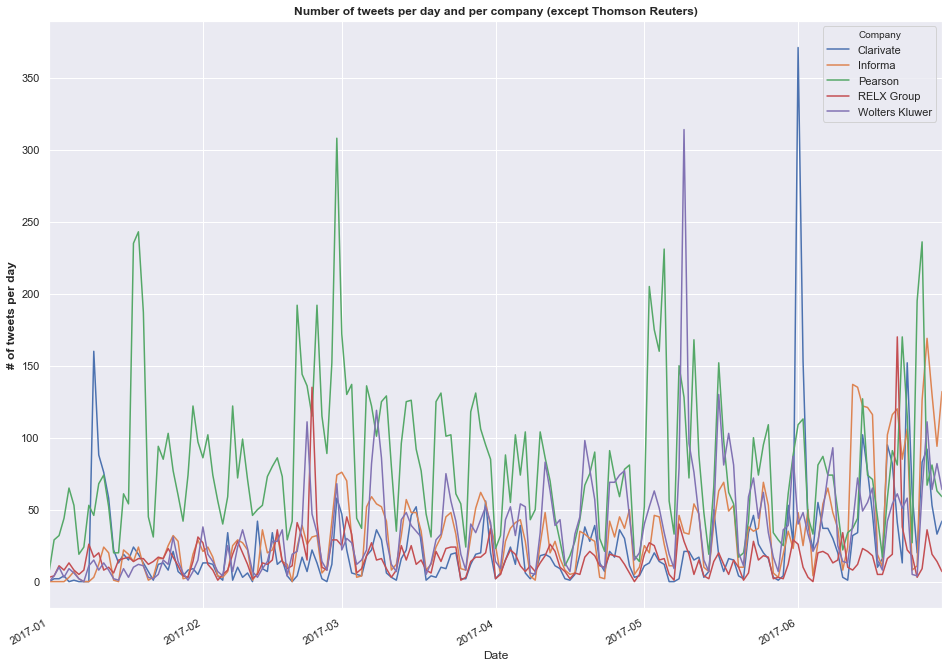

In [43]:
df_ts3.plot(figsize=(16,12))

# Set the title
plt.title('Number of tweets per day and per company (except Thomson Reuters)', fontweight="bold")

# Set y axis label
plt.ylabel("# of tweets per day", fontweight="bold")

plt.show()

#### Plot rolling mean over 7 days to get more visibility

In [44]:
rollingcla = df_ts3['Clarivate'].rolling(7, center=True)
rollinginf = df_ts3['Informa'].rolling(7, center=True)
rollingpea = df_ts3['Pearson'].rolling(7, center=True)
rollingrelx = df_ts3['RELX Group'].rolling(7, center=True)
rollingwol = df_ts3['Wolters Kluwer'].rolling(7, center=True)

In [45]:
rollingcla.sum().mean()

167.02857142857144

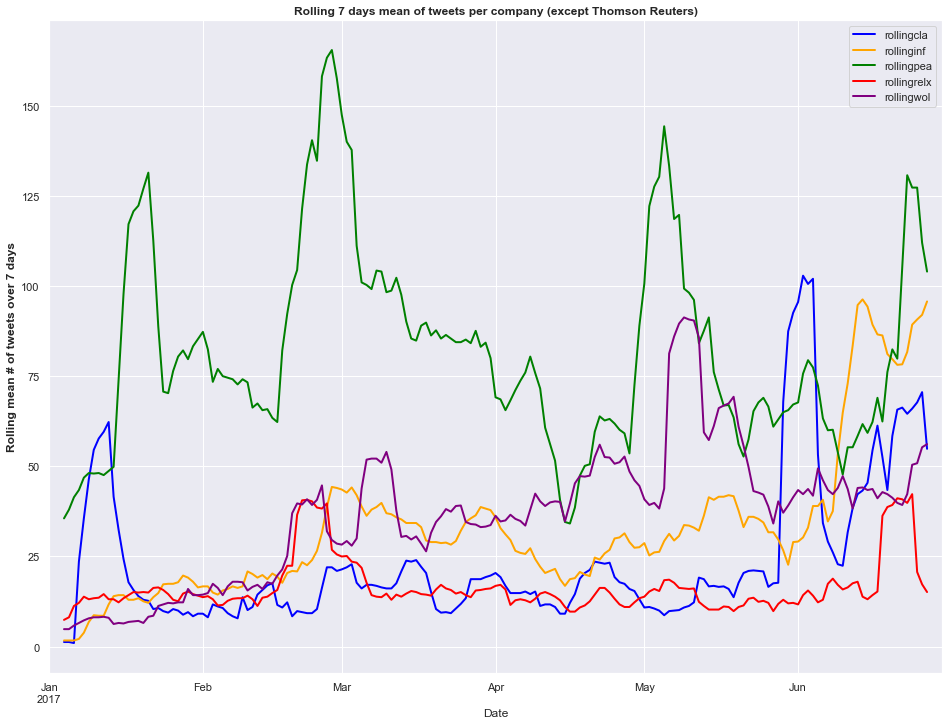

In [46]:
# Plot rolling mean per company
rollingcla.mean().plot(figsize=(16,12), color='blue', linewidth=2)
rollinginf.mean().plot(figsize=(16,12), color='orange', linewidth=2)
rollingpea.mean().plot(figsize=(16,12), color='green', linewidth=2)
rollingrelx.mean().plot(figsize=(16,12), color='red', linewidth=2)
rollingwol.mean().plot(figsize=(16,12), color='purple', linewidth=2)

# Set the title
plt.title('Rolling 7 days mean of tweets per company (except Thomson Reuters)', fontweight="bold")

# Set the legend
plt.legend(['rollingcla', 'rollinginf', 'rollingpea', 'rollingrelx', 'rollingwol'], loc='upper right')

# Set y axis label
plt.ylabel("Rolling mean # of tweets over 7 days", fontweight="bold")

plt.show()

### Create a dataframe with Thomson Reuters only

In [47]:
df_ts2.head()

Company,Clarivate,Informa,Pearson,RELX Group,Thomson Reuters,Wolters Kluwer
Date,,,,,,
2017-01-01 00:00:00,0.0,0.0,7.0,3.0,70.0,0.0
2017-01-02 00:00:00,2.0,0.0,29.0,4.0,134.0,4.0
2017-01-03 00:00:00,2.0,0.0,32.0,11.0,393.0,10.0
2017-01-04 00:00:00,4.0,0.0,44.0,8.0,571.0,3.0
2017-01-05 00:00:00,0.0,3.0,65.0,13.0,595.0,9.0


In [48]:
df_tr=df_ts[(df_ts['Company']  == 'Thomson Reuters')]

In [49]:
df_tr.head()

,Date,Post_ID,Company
0,2017-06-09,898354849,Thomson Reuters
1,2017-03-20,668466776,Thomson Reuters
2,2017-06-02,467220348,Thomson Reuters
3,2017-04-12,350836585,Thomson Reuters
6,2017-02-24,546886484,Thomson Reuters


In [50]:
df_tr["Date"] = pd.to_datetime(df_tr["Date"])

# Organize the features to be plotted
df_tr1=pd.crosstab(index=[df_tr['Date']], columns=df_tr['Company'], values=df_tr['Post_ID'], aggfunc='count', margins=True)

# Replace missing data by 0 and create a new dataframe (All comapnies)
df_tr2=df_tr1.fillna(0)

# remove the All column
df_tr2.drop('All', axis=1, inplace=True)

# remove the All row
df_tr2.drop('All', axis=0, inplace=True)


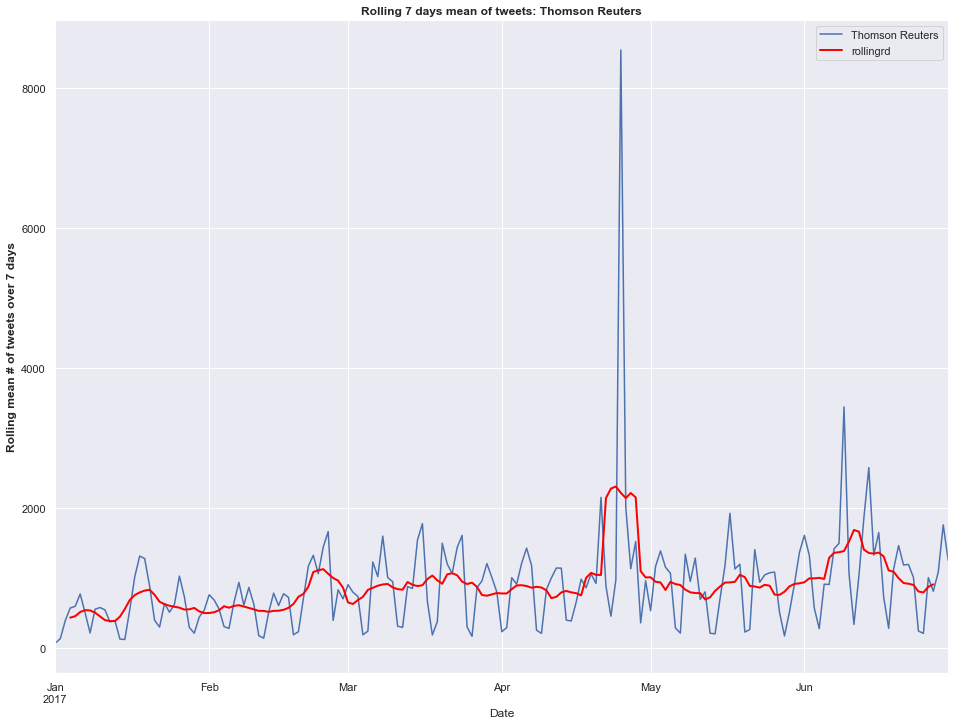

In [51]:
# 1 week rolling mean of Thomson Reuters data
rollingtr = df_tr2['Thomson Reuters'].rolling(7, center=True)
df_tr2['Thomson Reuters'].plot(figsize=(16,12))
rollingtr.mean().plot(color='red', linewidth=2)

# Set the title
plt.title('Rolling 7 days mean of tweets: Thomson Reuters', fontweight="bold")

# Set the legend
plt.legend(['Thomson Reuters', 'rollingrd'], loc='upper right')

# Set y axis label
plt.ylabel("Rolling mean # of tweets over 7 days", fontweight="bold")

plt.show()

## Analysis of tweets over time (from January to June 2017)
> * The purpose is to identify outliers (days with very high number of tweets) as it would be useful to be understand/highlight the context for the modeling part afterwards
* Outliers are defined based on z score with a threshold of 3
* Nb of outliers per company is ranged between 1 (Wolters Kluwer) to 4 (Informa) and would occur mostly in January or June. We may assume that it would linked to specific anouncement such as end and mid-year financial results. NLP analysis would provide us with more insights.

### Create a function to identify outliers (# of tweets) per company

In [52]:
def outliers(name):
    # use Z score with a threshold of 3 to get the days with the highest number of tweets
    z = np.abs(df_ts2[name] - df_ts2[name].mean()) > (3*df_ts2[name].std())
    
    # Select all the rows now considered as outliers for the given company name
    outliers = df_ts2.loc[z, :]
    
    # Create a column to identify outliers
    outliers['outliers']=name
    
    print('Outliers')
    print('Number days:', z.sum())
    print('Number of tweets in total', outliers[name].sum())
    print('Mean per day:', outliers[name].mean())
    print('List of days:', outliers[name])

#### **Thomson Reuters**

In [53]:
name=('Thomson Reuters')
outliers1 = outliers(name)

Outliers
Number days: 2
Number of tweets in total 11991.0
Mean per day: 5995.5
List of days: Date
2017-04-25    8546.0
2017-06-09    3445.0
Name: Thomson Reuters, dtype: float64


#### **Clarivate**

In [54]:
name=('Clarivate')
outliers2 = outliers(name)

Outliers
Number days: 4
Number of tweets in total 836.0
Mean per day: 209.0
List of days: Date
2017-01-10    160.0
2017-06-01    371.0
2017-06-02    153.0
2017-06-23    152.0
Name: Clarivate, dtype: float64


#### **Informa**

In [55]:
name=('Informa')
outliers3 = outliers(name)

Outliers
Number days: 4
Number of tweets in total 573.0
Mean per day: 143.25
List of days: Date
2017-06-12    137.0
2017-06-13    135.0
2017-06-27    169.0
2017-06-30    132.0
Name: Informa, dtype: float64


#### **Pearson**

In [56]:
name=('Pearson')
outliers4 = outliers(name)

Outliers
Number days: 3
Number of tweets in total 787.0
Mean per day: 262.3333333333333
List of days: Date
2017-01-19    243.0
2017-02-28    308.0
2017-06-26    236.0
Name: Pearson, dtype: float64


#### **RELX Group**

In [57]:
name=('RELX Group')
outliers5 = outliers(name)

Outliers
Number days: 2
Number of tweets in total 305.0
Mean per day: 152.5
List of days: Date
2017-02-23    135.0
2017-06-21    170.0
Name: RELX Group, dtype: float64


#### **Wolters Kluwer**

In [58]:
name=('Wolters Kluwer')
outliers6 = outliers(name)

Outliers
Number days: 1
Number of tweets in total 314.0
Mean per day: 314.0
List of days: Date
2017-05-09    314.0
Name: Wolters Kluwer, dtype: float64


### Conclusions about outliers
>* The total number of days considered as outliers is limited (16 days)
* We keep those days in the data set
* As we have identifed them, we could consolidate them if need be at a later stage

## Analysis and feature engineering of numerical features
> * The objective is to check the distribution profile of those features in order to assess whether or not we would need to perform normalization (for future classification modeling)

In [59]:
twitter_eda.dtypes

Post_ID                           int64
Date                     datetime64[ns]
Company                          object
Snippet                          object
TW_Hashtags                      object
Country                          object
Country 2                        object
Sentiment                        object
ALL_Author                       object
ALL_Impact                        int64
ALL_Thread_Entry_Type            object
TW_Account_Type                  object
TW_Account_Name                  object
TW_KredOutreach                   int64
TWFB_NbReach                      int64
TW_NbFollowers                    int64
TW_NbFollowing                    int64
TW_Account_Retweet_of            object
TW_NbTweets                       int64
dtype: object

In [60]:
# select the integer columns (keep Post_ID as potential index for further data manipulation)
df_num = twitter_eda.select_dtypes(include=[np.int64, np.float64])
# df_num.drop('Post_ID', axis=1, inplace=True)

In [61]:
df_num.head()

,Post_ID,ALL_Impact,TW_KredOutreach,TWFB_NbReach,TW_NbFollowers,TW_NbFollowing,TW_NbTweets
0,898354849,28,0,424,56,162,1650
1,668466776,25,0,379,26,140,4054
2,467220348,25,0,372,22,0,216721
3,350836585,64,0,2521,842,154,95
4,673045446,41,0,606,1204,1369,6850


In [62]:
df_num.describe()

,Post_ID,ALL_Impact,TW_KredOutreach,TWFB_NbReach,TW_NbFollowers,TW_NbFollowing,TW_NbTweets
count,1.958800e+05,195880.000000,195880.000000,1.958800e+05,1.958800e+05,195880.000000,1.958800e+05
mean,5.006551e+08,36.348632,1.765872,7.599199e+02,2.741312e+04,1281.350684,5.765952e+04
std,2.885219e+08,12.170163,2.755416,5.283246e+03,6.083080e+05,5463.733813,2.221858e+05
min,2.980000e+03,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,1.000000e+00
25%,2.500184e+08,28.000000,0.000000,4.150000e+02,6.000000e+01,81.000000,9.860000e+02
50%,5.006470e+08,36.000000,0.000000,5.350000e+02,3.730000e+02,308.000000,3.941000e+03
75%,7.512672e+08,44.000000,4.000000,6.640000e+02,1.837000e+03,1000.000000,2.528725e+04
max,9.999981e+08,80.000000,11.000000,2.043194e+06,2.015375e+07,415512.000000,7.452297e+06


In [63]:
# Compute the correlation matrix
corr = df_num.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# define the style
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '200px', 'font-size': '10pt'})\
    .set_precision(2)\

,Post_ID,ALL_Impact,TW_KredOutreach,TWFB_NbReach,TW_NbFollowers,TW_NbFollowing,TW_NbTweets
Post_ID,1,-0.0008,0.0014,-0.0016,0.001,0.0019,-0.0041
ALL_Impact,-0.0008,1,0.48,0.13,0.12,0.19,0.19
TW_KredOutreach,0.0014,0.48,1,0.042,0.076,0.15,0.18
TWFB_NbReach,-0.0016,0.13,0.042,1,0.2,0.012,0.0053
TW_NbFollowers,0.001,0.12,0.076,0.2,1,0.013,0.023
TW_NbFollowing,0.0019,0.19,0.15,0.012,0.013,1,0.055
TW_NbTweets,-0.0041,0.19,0.18,0.0053,0.023,0.055,1


### Distribution plot of the numerical features

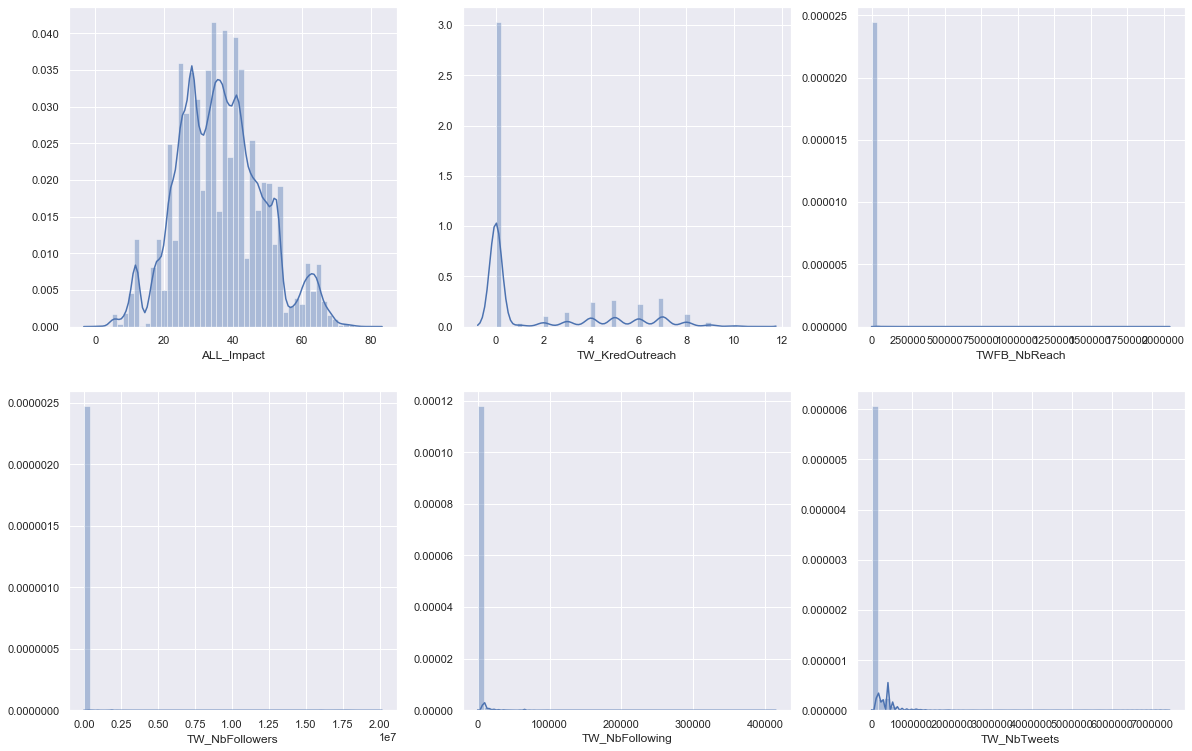

In [99]:
plt.subplot(331)
sns.distplot(df_num['ALL_Impact'])
plt.subplot(332)
sns.distplot(df_num['TW_KredOutreach'])
plt.subplot(333)
sns.distplot(df_num['TWFB_NbReach'])
plt.subplot(334)
sns.distplot(df_num['TW_NbFollowers'])
plt.subplot(335)
sns.distplot(df_num['TW_NbFollowing'])
plt.subplot(336)
sns.distplot(df_num['TW_NbTweets'])
plt.rcParams["figure.figsize"] = (20,20)

### Check distribution shape of 'All_impact' feature for each company


In [65]:
# Create dataframe for each company
ai_tr=twitter_eda[(twitter_eda['Company']  == 'Thomson Reuters')]
ai_cl=twitter_eda[(twitter_eda['Company']  == 'Clarivate')]
ai_inf=twitter_eda[(twitter_eda['Company']  == 'Informa')]
ai_per=twitter_eda[(twitter_eda['Company']  == 'Pearson')]
ai_relx=twitter_eda[(twitter_eda['Company']  == 'RELX Group')]
ai_wk=twitter_eda[(twitter_eda['Company']  == 'Wolters Kluwer')]

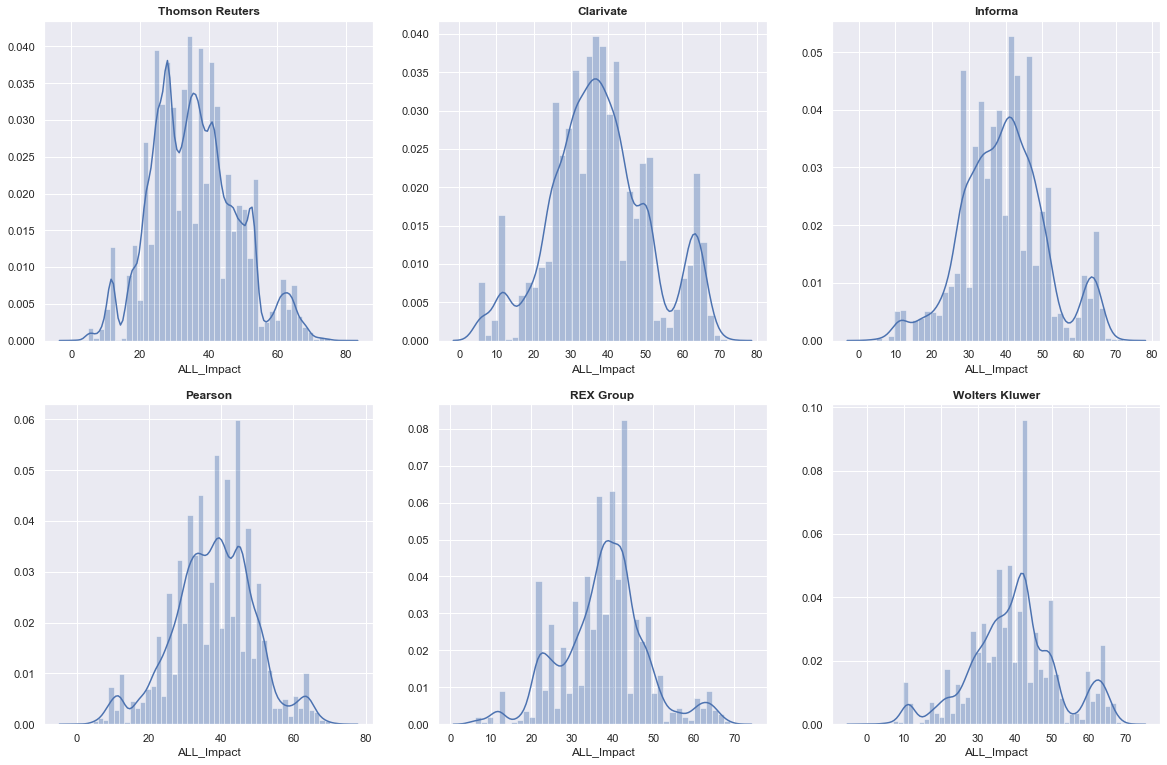

In [66]:
plt.subplot(331)
sns.distplot(ai_tr['ALL_Impact'])
plt.title('Thomson Reuters', fontweight="bold")
plt.subplot(332)
sns.distplot(ai_cl['ALL_Impact'])
plt.title('Clarivate', fontweight="bold")
plt.subplot(333)
sns.distplot(ai_inf['ALL_Impact'])
plt.title('Informa', fontweight="bold")
plt.subplot(334)
sns.distplot(ai_per['ALL_Impact'])
plt.title('Pearson', fontweight="bold")
plt.subplot(335)
sns.distplot(ai_relx['ALL_Impact'])
plt.title('REX Group', fontweight="bold")
plt.subplot(336)
sns.distplot(ai_wk['ALL_Impact'])
plt.title('Wolters Kluwer', fontweight="bold")
plt.rcParams["figure.figsize"] = (20,20)

#### **Conclusions**
* Numerical features are **not correlated** and All_Impact features presents a profile of normal distribution. Even there are some small variances in the All_Impact distribution per company, there is some consistency which reinforce the
* We can **log transform** features with very skewed distribution: TW_KredOutreach, TWFB_NbReach, TW_NbFollowers, TW_Following, TW_NbTweets. It will help to improve classifier model performance. As we observe '0' values for some features to be transformed, we will apply a log1p transformation which will prevent 'inf' values afterwards
* At this stage, we may consider as Target variable for our classification modeling either Sentiment (negative, neutral, positive) or All_Impact (that we could transform into categories:e.g. low, medium, high) which would present better balanced classes while keeping the pertinence of the objective of the modeling.
* Even there are some small variances in the All_Impact distribution per company, there is some consistency which reinforces to select **'ALL_Impact' as the prefered candidate as Target Variable**

### Log1p transformation of features

In [67]:
# Add a Log1p variables to the DataFrame
df_num['Log_TW_KredOutreach'] = np.log1p(df_num['TW_KredOutreach'])
df_num['Log_Nbreach'] = np.log1p(df_num['TWFB_NbReach'])
df_num['Log_TW_NbFollowers'] = np.log1p(df_num['TW_NbFollowers'])
df_num['Log_TW_NbFollowing'] = np.log1p(df_num['TW_NbFollowing'])
df_num['Log_TW_NbTweets'] = np.log1p(df_num['TW_NbTweets'])
df_num.head()

,Post_ID,ALL_Impact,TW_KredOutreach,TWFB_NbReach,TW_NbFollowers,TW_NbFollowing,TW_NbTweets,Log_TW_KredOutreach,Log_Nbreach,Log_TW_NbFollowers,Log_TW_NbFollowing,Log_TW_NbTweets
0,898354849,28,0,424,56,162,1650,0.0,6.052089,4.043051,5.093750,7.409136
1,668466776,25,0,379,26,140,4054,0.0,5.940171,3.295837,4.948760,8.307706
2,467220348,25,0,372,22,0,216721,0.0,5.921578,3.135494,0.000000,12.286371
3,350836585,64,0,2521,842,154,95,0.0,7.832808,6.736967,5.043425,4.564348
4,673045446,41,0,606,1204,1369,6850,0.0,6.408529,7.094235,7.222566,8.832150


In [68]:
df_num.describe()

,Post_ID,ALL_Impact,TW_KredOutreach,TWFB_NbReach,TW_NbFollowers,TW_NbFollowing,TW_NbTweets,Log_TW_KredOutreach,Log_Nbreach,Log_TW_NbFollowers,Log_TW_NbFollowing,Log_TW_NbTweets
count,1.958800e+05,195880.000000,195880.000000,1.958800e+05,1.958800e+05,195880.000000,1.958800e+05,195880.000000,195880.000000,195880.000000,195880.000000,195880.000000
mean,5.006551e+08,36.348632,1.765872,7.599199e+02,2.741312e+04,1281.350684,5.765952e+04,0.593393,6.306483,5.943384,5.596252,8.464520
std,2.885219e+08,12.170163,2.755416,5.283246e+03,6.083080e+05,5463.733813,2.221858e+05,0.865180,0.593925,2.324687,1.908931,2.388926
min,2.980000e+03,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000,0.693147,0.000000,0.000000,0.693147
25%,2.500184e+08,28.000000,0.000000,4.150000e+02,6.000000e+01,81.000000,9.860000e+02,0.000000,6.030685,4.110874,4.406719,6.894670
50%,5.006470e+08,36.000000,0.000000,5.350000e+02,3.730000e+02,308.000000,3.941000e+03,0.000000,6.284134,5.924256,5.733341,8.279443
75%,7.512672e+08,44.000000,4.000000,6.640000e+02,1.837000e+03,1000.000000,2.528725e+04,1.609438,6.499787,7.516433,6.908755,10.138095
max,9.999981e+08,80.000000,11.000000,2.043194e+06,2.015375e+07,415512.000000,7.452297e+06,2.484907,14.530025,16.818901,12.937269,15.824033


### Probability plot of Log transformed numerical data (except ALL_Impact kept as original)
> * This process is helpful to check the level of "normality" of the feature's distribution beyond the visualization done at the previous step
* **Log transformation has been effective for 3 features out of 5 being transformed** (Log_TW_NbFollowers, Log_TW_NbFollowing, Log_TW_NbTweets); less for Log_Nbreach
* Log_TW_KredOutreach presents a specific profile (almost as a categrical feature). We will decide during the modeling phase the pertinence to keep this feature or not

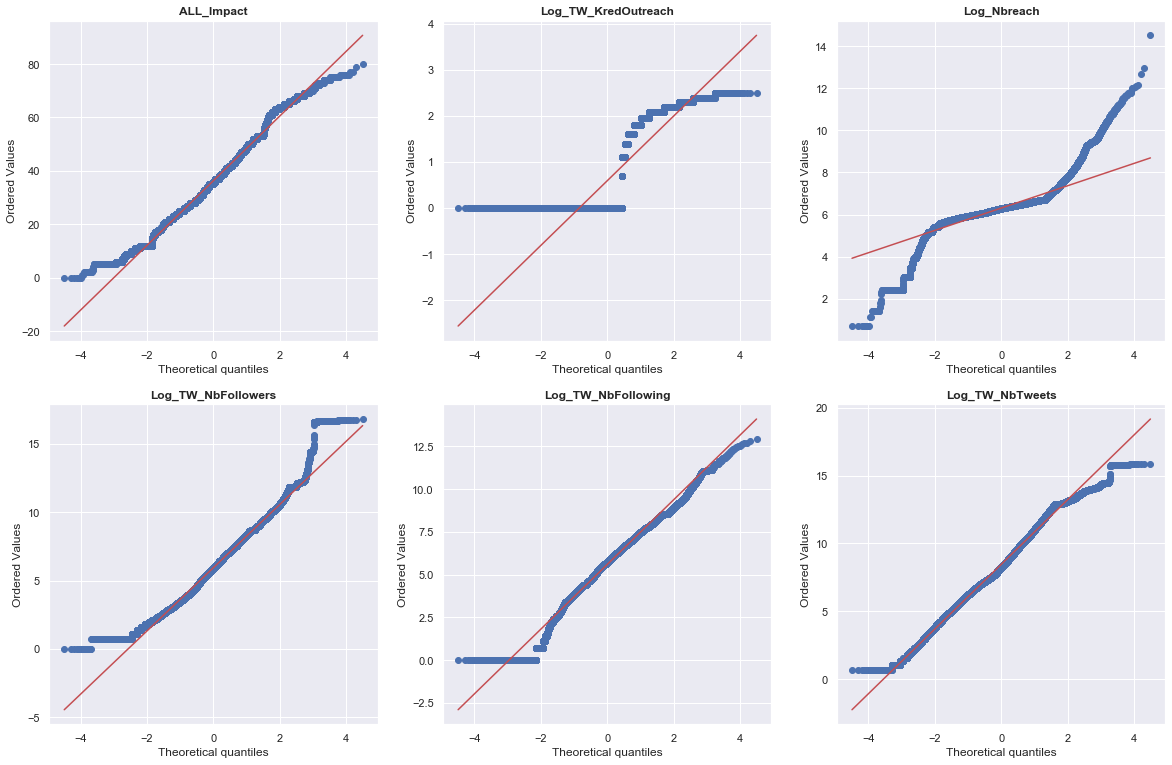

In [69]:
plt.subplot(331)
stats.probplot(df_num['ALL_Impact'], plot=plt)
plt.title('ALL_Impact', fontweight="bold")
plt.subplot(332)
stats.probplot(df_num['Log_TW_KredOutreach'], plot=plt)
plt.title('Log_TW_KredOutreach', fontweight="bold")
plt.subplot(333)
stats.probplot(df_num['Log_Nbreach'], plot=plt)
plt.title('Log_Nbreach', fontweight="bold")
plt.subplot(334)
stats.probplot(df_num['Log_TW_NbFollowers'], plot=plt)
plt.title('Log_TW_NbFollowers', fontweight="bold")
plt.subplot(335)
stats.probplot(df_num['Log_TW_NbFollowing'], plot=plt)
plt.title('Log_TW_NbFollowing', fontweight="bold")
plt.subplot(336)
stats.probplot(df_num['Log_TW_NbTweets'], plot=plt)
plt.title('Log_TW_NbTweets', fontweight="bold")
plt.rcParams["figure.figsize"] = (20,20)

## Analysis and feature engineering of categorical features
> * There are 5 features which are categorical: Company, Country, Sentiment, All_Thread_TYpe and TW_Account_Type
* Most of them are Nominal, except Sentiment which could be considered as ordinal
* Nominal features will be One-Hot encoded. Country 2 feature is set with the name of Top 20 countries (# of tweets). Other countries have been labeled 'Other'. It will limit the number of feature created and optimze the computing process. As there are some differences per company regarding the origin of tweets. We will keep this feature in the modeling process.
* Sentiment will be coded as Negative -1; neutral 0 and positive +1

In [70]:
twitter_eda.dtypes

Post_ID                           int64
Date                     datetime64[ns]
Company                          object
Snippet                          object
TW_Hashtags                      object
Country                          object
Country 2                        object
Sentiment                        object
ALL_Author                       object
ALL_Impact                        int64
ALL_Thread_Entry_Type            object
TW_Account_Type                  object
TW_Account_Name                  object
TW_KredOutreach                   int64
TWFB_NbReach                      int64
TW_NbFollowers                    int64
TW_NbFollowing                    int64
TW_Account_Retweet_of            object
TW_NbTweets                       int64
dtype: object

In [71]:
# Create a dataframe with categorical features (Post_ID is kept if we would this feature for indexing at a later stage)
df_cat=twitter_eda[['Post_ID','Company','Country 2','Sentiment','ALL_Thread_Entry_Type', 'TW_Account_Type']]

In [72]:
df_cat.head()

,Post_ID,Company,Country 2,Sentiment,ALL_Thread_Entry_Type,TW_Account_Type
0,898354849,Thomson Reuters,United States,neutral,share,individual
1,668466776,Thomson Reuters,Other,neutral,share,individual
2,467220348,Thomson Reuters,United States,neutral,post,organisational
3,350836585,Thomson Reuters,United Kingdom,neutral,post,organisational
4,673045446,Informa,United States,neutral,share,individual


#### One-Hot encoding of following features: Company, Country 2, ALL_Thread_Entry_Type, TW_Account_type

In [73]:
df_cat_nom=df_cat[['Company', 'Country 2','ALL_Thread_Entry_Type', 'TW_Account_Type']]

In [74]:
df_cat_nom.shape

(195880, 4)

In [75]:
encode_norm= pd.get_dummies(df_cat_nom)

In [76]:
encode_norm.shape

(195880, 38)

In [77]:
encode_norm.dtypes

Company_Clarivate                 uint8
Company_Informa                   uint8
Company_Pearson                   uint8
Company_RELX Group                uint8
Company_Thomson Reuters           uint8
Company_Wolters Kluwer            uint8
Country 2_Argentina               uint8
Country 2_Australia               uint8
Country 2_Belgium                 uint8
Country 2_Brazil                  uint8
Country 2_Canada                  uint8
Country 2_Ecuador                 uint8
Country 2_France                  uint8
Country 2_Germany                 uint8
Country 2_Hong Kong               uint8
Country 2_India                   uint8
Country 2_Italy                   uint8
Country 2_Japan                   uint8
Country 2_Mexico                  uint8
Country 2_Netherlands             uint8
Country 2_Other                   uint8
Country 2_Philippines             uint8
Country 2_Russia                  uint8
Country 2_Serbia                  uint8
Country 2_Singapore               uint8


In [78]:
# Transform dtype from uint8 to int64
encode_norm=encode_norm.astype(np.int64)

#### Encode ordinal feature: sentiment

In [79]:
df_cat=df_cat.replace({"Sentiment" : {'negative':-1, 'neutral': 0, 'positive': 1}})

In [80]:
df_cat.head()

,Post_ID,Company,Country 2,Sentiment,ALL_Thread_Entry_Type,TW_Account_Type
0,898354849,Thomson Reuters,United States,0,share,individual
1,668466776,Thomson Reuters,Other,0,share,individual
2,467220348,Thomson Reuters,United States,0,post,organisational
3,350836585,Thomson Reuters,United Kingdom,0,post,organisational
4,673045446,Informa,United States,0,share,individual


In [81]:
df_sentiment_encod=df_cat[['Sentiment']]

### Concatenate different datasets created for feature engineering in one dataset
> * We will create 2 dataframes. 'masterdata_raw' with all transformed features which would be the reference raw numerical dataset in case of further need to review feature transformation. The second one ('masterdata_ml') with slected features to be pushed to the modeling phase

In [82]:
# Master file
twitter_eda.shape

(195880, 19)

In [83]:
# Dataset with numerical features log transformed
df_num.shape

(195880, 12)

In [84]:
# Dataset with the sentiment feature labeled
df_sentiment_encod.shape

(195880, 1)

In [85]:
# Dataset with One-Hot encoding
encode_norm.shape

(195880, 38)

In [86]:
# Merge encoded nominal and ordinal features
encode_tot=pd.merge(df_sentiment_encod,encode_norm, right_index=True, left_index=True)
encode_tot.shape

(195880, 39)

In [87]:
# Merge encoded features with log_transform features
df_feateng=pd.merge(encode_tot,df_num, right_index=True, left_index=True)

In [88]:
df_feateng.shape

(195880, 51)

In [89]:
# Select features to be added from the master file (twitter_eda)
select_feat=twitter_eda[['Date', 'Snippet','TW_Hashtags','ALL_Author','TW_Account_Name']]

In [90]:
select_feat.shape

(195880, 5)

### Masterdata_raw: Reference dataset with all numerical and categorical features

In [91]:
# Merge dataset with all feautre engineered and the missing features from the original master file
masterdata_raw=pd.merge(df_feateng,select_feat, right_index=True, left_index=True)

In [92]:
masterdata_raw.shape

(195880, 56)

In [93]:
masterdata_raw.head()

,Sentiment,Company_Clarivate,Company_Informa,Company_Pearson,Company_RELX Group,Company_Thomson Reuters,Company_Wolters Kluwer,Country 2_Argentina,Country 2_Australia,Country 2_Belgium,Country 2_Brazil,Country 2_Canada,Country 2_Ecuador,Country 2_France,Country 2_Germany,Country 2_Hong Kong,Country 2_India,Country 2_Italy,Country 2_Japan,Country 2_Mexico,Country 2_Netherlands,Country 2_Other,Country 2_Philippines,Country 2_Russia,Country 2_Serbia,Country 2_Singapore,Country 2_South Africa,Country 2_Spain,Country 2_Switzerland,Country 2_United Arab Emirates,Country 2_United Kingdom,Country 2_United States,Country 2_Venezuela,ALL_Thread_Entry_Type_post,ALL_Thread_Entry_Type_reply,ALL_Thread_Entry_Type_share,TW_Account_Type_Not identified,TW_Account_Type_individual,TW_Account_Type_organisational,Post_ID,ALL_Impact,TW_KredOutreach,TWFB_NbReach,TW_NbFollowers,TW_NbFollowing,TW_NbTweets,Log_TW_KredOutreach,Log_Nbreach,Log_TW_NbFollowers,Log_TW_NbFollowing,Log_TW_NbTweets,Date,Snippet,TW_Hashtags,ALL_Author,TW_Account_Name
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,898354849,28,0,424,56,162,1650,0.0,6.052089,4.043051,5.093750,7.409136,2017-06-09,anniversary project timesquare thomson reuters...,2017btsfesta,titina_joner,tw account not identified
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,668466776,25,0,379,26,140,4054,0.0,5.940171,3.295837,4.948760,8.307706,2017-03-20,nearly canadians deport people illegally cross...,No TW hashtag,dasCameo1,tw account not identified
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,467220348,25,0,372,22,0,216721,0.0,5.921578,3.135494,0.000000,12.286371,2017-06-02,support associate thomson reuters carrollton i...,"indeed, jobs",lumpyspace_tst2,tw account not identified
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,350836585,64,0,2521,842,154,95,0.0,7.832808,6.736967,5.043425,4.564348,2017-04-12,mifidii compliance challenge mifidii ready ana...,"MiFIDII, TRRisk",mifidii,tw account not identified
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,673045446,41,0,606,1204,1369,6850,0.0,6.408529,7.094235,7.222566,8.832150,2017-02-15,challenges implementing insurance projects imp...,"infographic, iot",daviddefelipe,david de felipe


### Masterdata_ml: Dataframe with selected features eligible for the modeling phase
> * The following features will be dropped: TW_KredOutreach, TWFB_NbReach, TW_NbFollowers, TW_NbFollowing, TW_NbTweets, Date, Snippet, TW_Hashtags
* Post_ID, TW_Account_Name and All_authors will be kept if we would need to get more details to identify the source of tweets. These features will not be processed in the modeling phase.
* We keep text related features as we will need them for the NLP phase. We will drop them afterwards.

In [95]:
masterdata_ml=masterdata_raw.drop(['TW_KredOutreach', 'TWFB_NbReach', 'TW_NbFollowers', 'TW_NbFollowing', 'TW_NbTweets', 'Date'], axis = 1)

In [96]:
masterdata_ml.shape

(195880, 50)

In [97]:
masterdata_ml.head()

,Sentiment,Company_Clarivate,Company_Informa,Company_Pearson,Company_RELX Group,Company_Thomson Reuters,Company_Wolters Kluwer,Country 2_Argentina,Country 2_Australia,Country 2_Belgium,Country 2_Brazil,Country 2_Canada,Country 2_Ecuador,Country 2_France,Country 2_Germany,Country 2_Hong Kong,Country 2_India,Country 2_Italy,Country 2_Japan,Country 2_Mexico,Country 2_Netherlands,Country 2_Other,Country 2_Philippines,Country 2_Russia,Country 2_Serbia,Country 2_Singapore,Country 2_South Africa,Country 2_Spain,Country 2_Switzerland,Country 2_United Arab Emirates,Country 2_United Kingdom,Country 2_United States,Country 2_Venezuela,ALL_Thread_Entry_Type_post,ALL_Thread_Entry_Type_reply,ALL_Thread_Entry_Type_share,TW_Account_Type_Not identified,TW_Account_Type_individual,TW_Account_Type_organisational,Post_ID,ALL_Impact,Log_TW_KredOutreach,Log_Nbreach,Log_TW_NbFollowers,Log_TW_NbFollowing,Log_TW_NbTweets,Snippet,TW_Hashtags,ALL_Author,TW_Account_Name
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,898354849,28,0.0,6.052089,4.043051,5.093750,7.409136,anniversary project timesquare thomson reuters...,2017btsfesta,titina_joner,tw account not identified
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,668466776,25,0.0,5.940171,3.295837,4.948760,8.307706,nearly canadians deport people illegally cross...,No TW hashtag,dasCameo1,tw account not identified
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,467220348,25,0.0,5.921578,3.135494,0.000000,12.286371,support associate thomson reuters carrollton i...,"indeed, jobs",lumpyspace_tst2,tw account not identified
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,350836585,64,0.0,7.832808,6.736967,5.043425,4.564348,mifidii compliance challenge mifidii ready ana...,"MiFIDII, TRRisk",mifidii,tw account not identified
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,673045446,41,0.0,6.408529,7.094235,7.222566,8.832150,challenges implementing insurance projects imp...,"infographic, iot",daviddefelipe,david de felipe


### Save new master dataset into a csv file

In [98]:
# masterdata_ml.to_csv('masterdata_ml.csv')